<a href="https://colab.research.google.com/github/dudesparsh/100-days-of-code/blob/master/07_Image_Processing_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.pieriandata.com"><img src="../DATA/Logo.jpg"></a>
*Copyright Pierian Data Inc.*

# Image Processing Assessment

Complete the tasks in bold below! Feel free to treat this as a code along by skipping this assessment lecture and moving straight to the solutions lecture!

**Some Useful Code is already here for you in the cells below:**

In [0]:
# Importing the libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [0]:
# Defining function for displaying images in required format
def display_img(img,cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

**TASK: Open and display the giaraffes.jpg image that is located in the DATA folder.**

In [3]:
# Importing data from google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Reading the image using OpenCV
img = cv2.imread("/content/gdrive/My Drive/Computer-Vision-with-Python/DATA/giraffes.jpg")

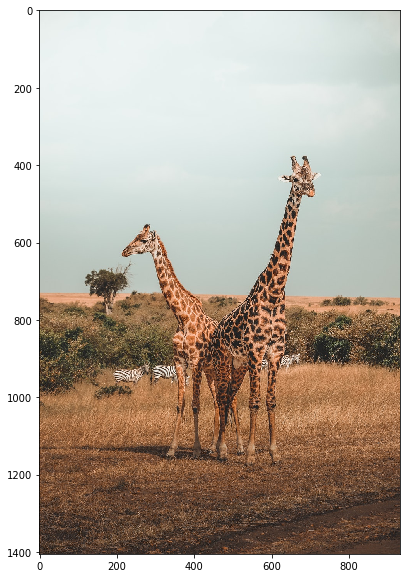

In [9]:
# Changing the image's format from OpenCV's default  BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display_img(img)

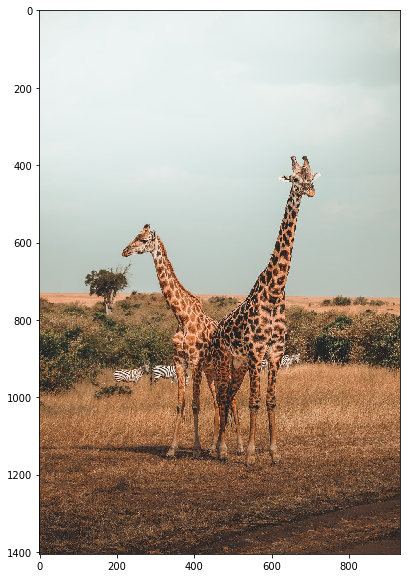

**TASK:Apply a binary threshold onto the image.**

In [0]:
# Defining function for displaying images in required format
def display_img2(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

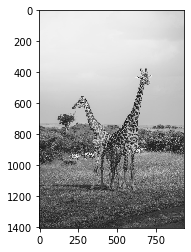

In [37]:
img2 = cv2.imread('/content/gdrive/My Drive/Computer-Vision-with-Python/DATA/giraffes.jpg',0)
display_img2(img2)

In [0]:
# Applying the threshold function where all pixels less than 127 -> 0 and ones greater tha 127 -> 255
ret, thresh1 = cv2.threshold(img2, 127,255, cv2.THRESH_BINARY)

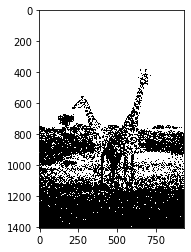

In [44]:
display_img2(thresh1)

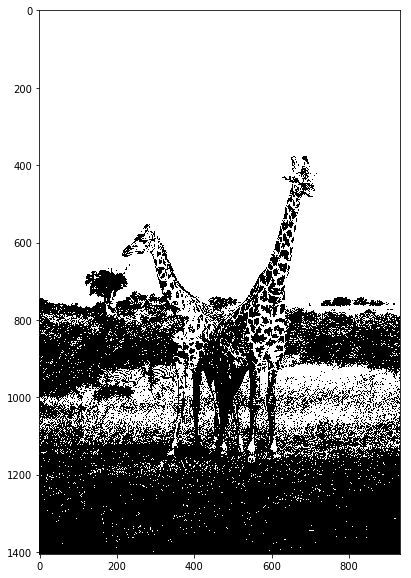

**TASK: Open the giaraffes.jpg file from the DATA folder and convert its colorspace to  HSV and display the image.**

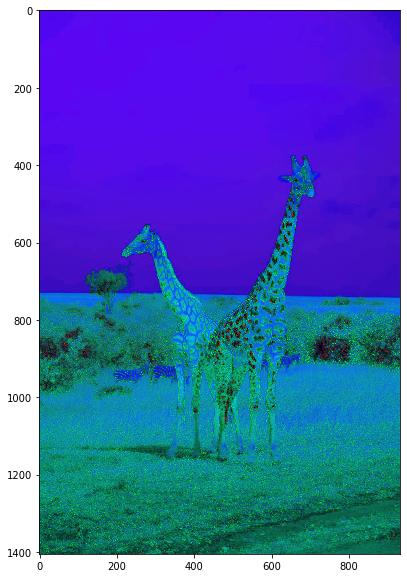

In [46]:
img3 = cv2.imread('/content/gdrive/My Drive/Computer-Vision-with-Python/DATA/giraffes.jpg')
img4 = cv2.cvtColor(img3, cv2.COLOR_BGR2HSV)
display_img(img4)

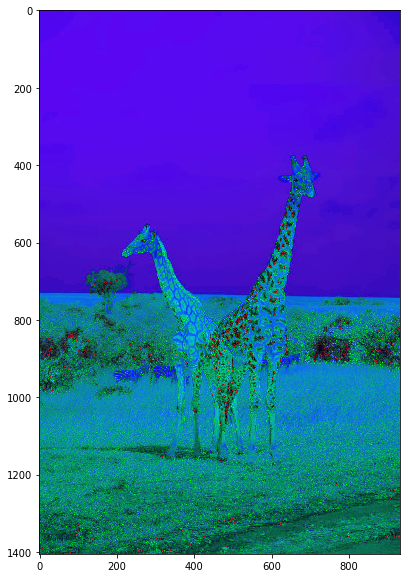

**TASK: Create a low pass filter with a 4 by 4 Kernel filled with values of 1/10 (0.01) and then use 2-D Convolution to blur the giraffer image (displayed in normal RGB)**

In [49]:
# Creating a 4,4 kernel with values 1/10
kernel = np.ones(shape=(4,4), dtype=np.float32)/10
kernel

array([[0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1]], dtype=float32)

array([[0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1]], dtype=float32)

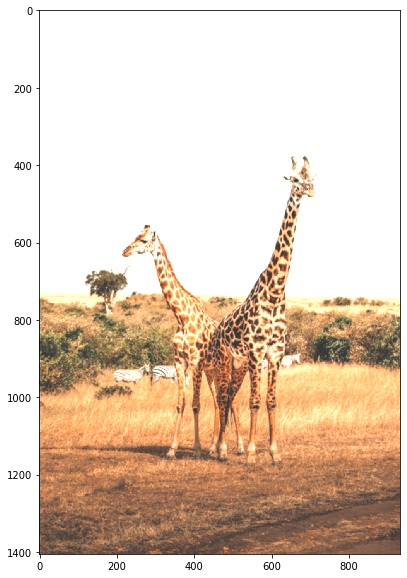

In [52]:
# Applying filter of the kernel created in above step
img5 = cv2.imread('/content/gdrive/My Drive/Computer-Vision-with-Python/DATA/giraffes.jpg')
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
dst = cv2.filter2D(img5,-1, kernel)
display_img(dst)

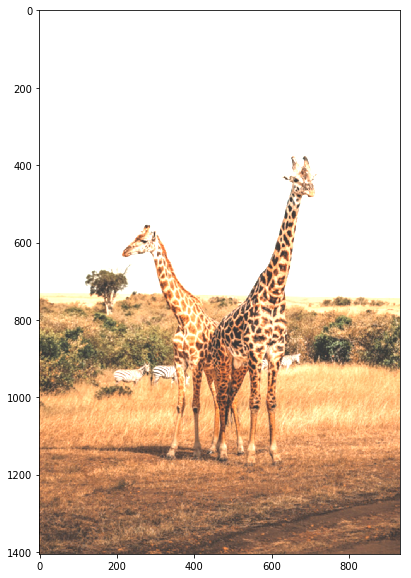

**TASK: Create a Horizontal Sobel Filter (sobelx from our lecture) with a kernel size of 5 to the grayscale version of the giaraffes image and then display the resulting gradient filtered version of the image.**

In [0]:
img7 = cv2.imread('/content/gdrive/My Drive/Computer-Vision-with-Python/DATA/giraffes.jpg')
img7 = cv2.cvtColor(img7, cv2.COLOR_BGR2GRAY)

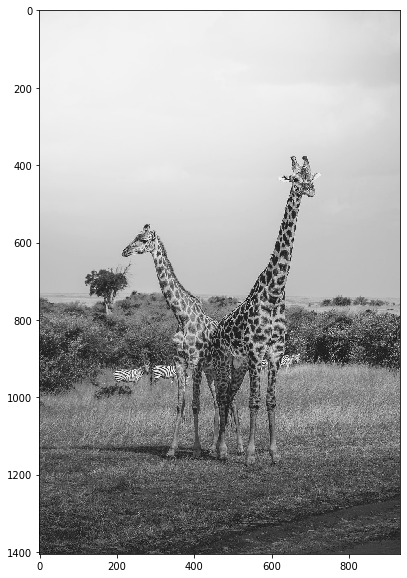

In [61]:
display_img2(img7)

In [0]:
# Applying sobel gradient - used for edge detection
# We did it 2 times, once along x and once along y
sobelx = cv2.Sobel(img7, cv2.CV_64F, 1,0, ksize=5)
sobely = cv2.Sobel(img7, cv2.CV_64F, 0 ,1, ksize=5)

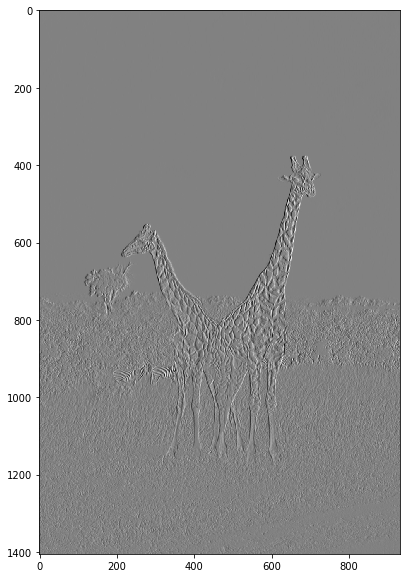

In [64]:
display_img2(sobelx)

In [0]:
# After sobel, we blend x & y component using the addWeighted function with 50% weights of both
blended = cv2.addWeighted(src1= sobelx,alpha=0.5, src2 = sobely, beta=0.5, gamma=0)

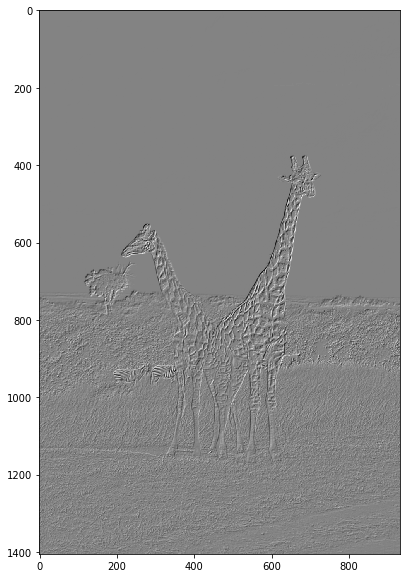

In [66]:
display_img3(blended)

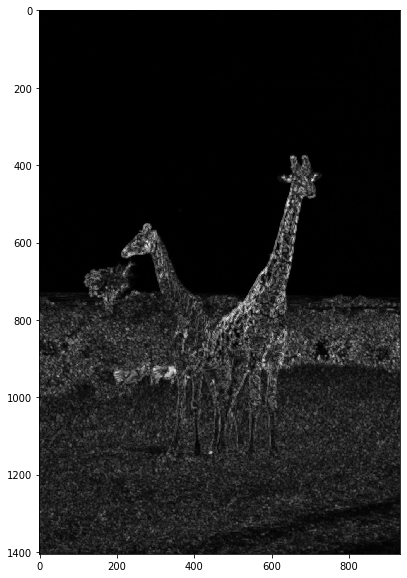

In [68]:
# Extras : using morphology gradient
gradient = cv2.morphologyEx(blended, cv2.MORPH_GRADIENT,kernel)
display_img3(gradient)

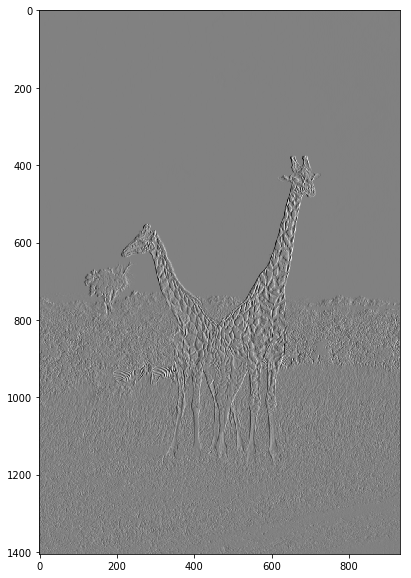

**TASK: Plot the color histograms for the RED, BLUE, and GREEN channel of the giaraffe image. Pay careful attention to the ordering of the channels.**

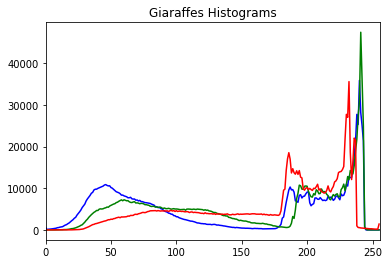

In [70]:
# Creating histograms of RGB colors in our giraffes image
img =cv2.imread('/content/gdrive/My Drive/Computer-Vision-with-Python/DATA/giraffes.jpg')
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i], None, [256],[0,256])
    plt.plot(histr, color=col)
    plt.xlim([0,256])
plt.title('Giaraffes Histograms')
plt.show()

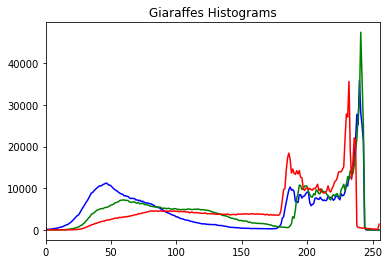

# Great job!